# Project: Analyzing Medical Appointments in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this Project, a sample of 100k medical appointments in Brazil was collected with the aim of determing if patients will show up for their appointment. Specifically, we will be seeking to know what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? These factors includes: Is the Patient enrolled in Brasilian welfare program Bolsa Família?. Did the Patient recieved a Short Message Service (SMS)?. Is the Patient diagnosed of any illness?. How old is a Patient? The result of this analysis will help the medical practioners to make informed decisions.  
>
>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure

<a id='wrangling'></a>
## Data Wrangling

> By Data Wrangling we load in the data, check for cleanliness, and then trim and clean our dataset for analysis. We ensure that each steps of the process is documented to carefully justify our cleaning decisions.

### General Properties

In [93]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [94]:
df.shape


(110527, 14)

The figures above indicate that there are 110527 Patients and 14 features. 

In [95]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In our descriptive statistics above we can see that 32% of the patients recieved SMS probably as a means to remind them of
their scheduled appointment, and 75% of them were 55 years old. 19% of them were Hipertensive and 9.8% of the patients were
enrolled in Brasilian welfare program Bolsa Família, this figure is very insignificant compared to the total number of patients and would likely affect a patient showing up for appointment.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [97]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis = 1, inplace = True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [98]:
df.rename(columns = {'No-show' : 'Showed'}, inplace = True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [99]:
df['Showed'] = df['Showed'].map(
                   {'Yes':1 ,'No':0})
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


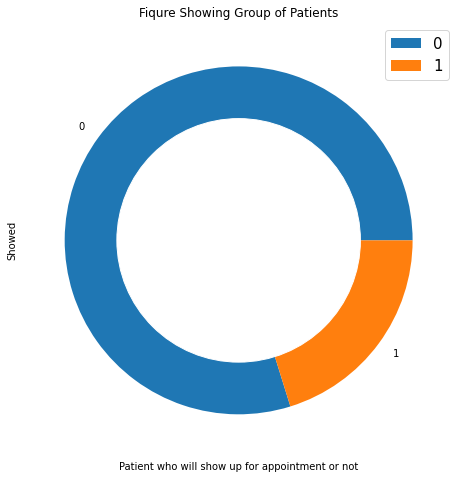

In [100]:
df['Showed'].value_counts().plot(kind="pie", figsize=(12,8))
plt.xlabel("Patient who will show up for appointment or not")
plt.title("Fiqure Showing Group of Patients")
plt.legend(fontsize=15)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

Zero (0) account for the majority of Patients who will sow up

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110527 non-null  object
 1   Age           110527 non-null  int64 
 2   Scholarship   110527 non-null  int64 
 3   Hipertension  110527 non-null  int64 
 4   Diabetes      110527 non-null  int64 
 5   Alcoholism    110527 non-null  int64 
 6   Handcap       110527 non-null  int64 
 7   SMS_received  110527 non-null  int64 
 8   Showed        110527 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 7.6+ MB


## Data Cleaning
Looking at the information concerning the dataset, we can see that there are no missing values and the dateset looks clean
and set for exploratory Analysis. However, there are some columns we don't need for the analysis, and we dropped them. Also the column name of No-show is changed to **Showed** as well as the values **yes** and **no** to 1 and 0, where 1 indicate **no show up** and 0 indicating **show up** for better analysis.

<a id='eda'></a>
## Exploratory Data Analysis

>With our dataset clean, we now compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. Our analysis will be a systematic approach. Looking at one variable at a time, and then following it up by looking at relationships between variables. Our dependent variable is **showing up for a schedule appointment or Not**

### Is the Patient enrolled in Brasilian welfare program Bolsa Família?

In [102]:
# We now create a mask for patient who showed up and those who did not
show_up = df.Showed == True
no_show = df.Showed == False

show_up = df['Showed'] == 0
no_show = df['Showed'] == 1
df['show_up'] = show_up
df['no_show'] = no_show

df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed,show_up,no_show
0,F,62,0,1,0,0,0,0,0,True,False
1,M,56,0,0,0,0,0,0,0,True,False
2,F,62,0,0,0,0,0,0,0,True,False
3,F,8,0,0,0,0,0,0,0,True,False
4,F,56,0,1,1,0,0,0,0,True,False


In [103]:
df.Scholarship[show_up].mean()

0.09390304734264465

In [104]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [105]:
df.Scholarship[no_show].mean()

0.11550696715802679

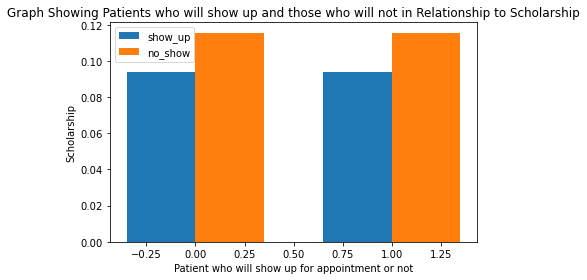

In [106]:
#Graphical Illustration Using bar graph
labels = ['Show Up', 'No Show']
show_up_mean = df.Scholarship[show_up].mean()
noShow_mean = df.Scholarship[no_show].mean()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, show_up_mean, width, label='show_up')
rects2 = ax.bar(x + width/2, noShow_mean, width, label='no_show')

plt.xlabel('Patient who will show up for appointment or not')
ax.set_ylabel('Scholarship')
ax.set_title('Graph Showing Patients who will show up and those who will not in Relationship to Scholarship')
ax.legend(fontsize=10)
fig.tight_layout()
plt.show()


## Description of the Analysis Above
Comparing the mean of the patients who will not show up (0.11) for their schedule appointment with those who will (0.09) in relation to if a patient is on the Brasilian welfare program Bolsa Família scholarship, we can see that the mean of those who will not turn up is significantly higher than those who will show up. This goes further to show that a patient may be on the Scholarship, and may not likely show up for their appoint. Scholarship is therefore not a derterministic factor in this regards.


### Did the Patient recieved a Short Message Service (SMS)?.

In [107]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [108]:
#We also look at the means of the two groups as regards recieved a Short Message Service (SMS)
df.SMS_received[show_up].mean()

0.2913341193542536

In [109]:
df.SMS_received[no_show].mean()

0.43837089475334917

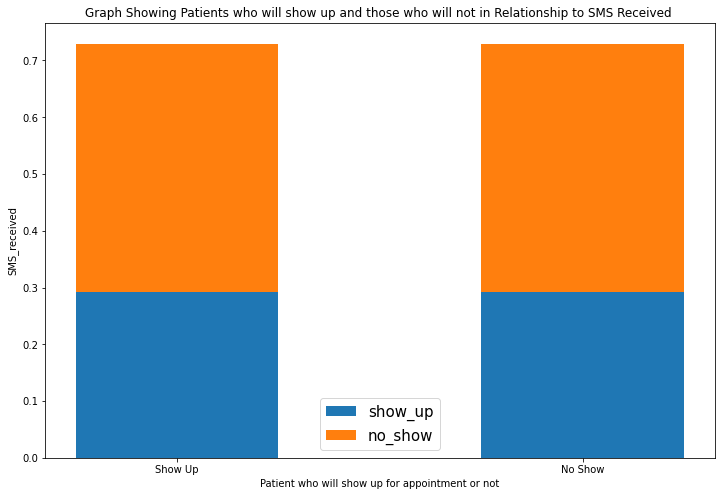

In [110]:
#Let us show this on a graph
showMean = df.SMS_received[show_up].mean()
no_showMean = df.SMS_received[no_show].mean()
# Define width of stacked chart

w = 0.5
figure(figsize=(12,8))
# Plot stacked bar chart
Class = ["Show Up", "No Show"]
plt.bar(Class, showMean, w, label='show_up')
plt.bar(Class, no_showMean, w, bottom=showMean,label='no_show')

# Display
plt.xlabel('Patient who will show up for appointment or not')
plt.ylabel('SMS_received')
plt.title("Graph Showing Patients who will show up and those who will not in Relationship to SMS Received ")
plt.legend(fontsize=15)
plt.show()

## Description of the Analysis Above
Here again we observe that the 44% of the Patients recieved Short Message Service (SMS) as against 29% of them. This is a
good indication that there is a chance some patient might forgot their scheduled appointment. However, with an Short Message Service (SMS)sent to them, they might remember and show up for their appointment. Generally, a lot of patients didnt recieve an (SMS).

### How old is a Patient?

In [111]:
#Let analyse the age and see if it determine if a Patient will show up or not
# Again we look at the average age of the two catogories
df.Age[show_up].mean()

37.790064393252315

In [112]:
df.Age[no_show].mean()

34.31766656212196

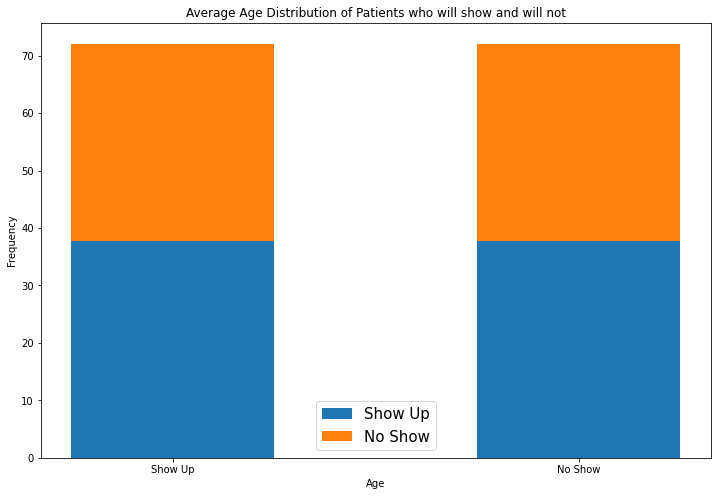

In [113]:
#We now plot this on graph
label = ["Show Up", "No Show"]
ageShowup = df.Age[show_up].mean()
ageNoshow = df.Age[no_show].mean()
w = 0.5
figure(figsize=(12,8))
plt.bar(label, ageShowup, w, label='Show Up')
plt.bar(label, ageNoshow, w, bottom=ageShowup, label='No Show')
plt.title("Average Age Distribution of Patients who will show and will not")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(fontsize=15)
plt.show()


### Description of the Analysis Above
The average age of those patients who will show up for their slated appointment is 34, this is insignificant to 37 of those patients who will not show up. This implies that younger people are more likely to show up for their schedile appointment compare to older people.

## Is the Patient diagnosed of any illness such as (Hipertension,	Diabetes,	Alcoholism,	Handcap) ?
### Is the Patient Hipertensive?

In [114]:
# Considering other factors such as if a patient was diagnosed of illness
df.Hipertension[show_up].mean()

0.20439189189189189

In [115]:
df.Hipertension[no_show].mean()

0.16900398763385457

In [116]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

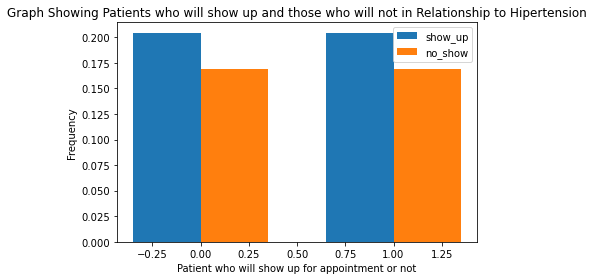

In [117]:
labels = ['Show Up', 'No Show']
show_up_mean = df.Hipertension[show_up].mean()
noShow_mean = df.Hipertension[no_show].mean()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, show_up_mean, width, label='show_up')
rects2 = ax.bar(x + width/2, noShow_mean, width, label='no_show')

plt.xlabel('Patient who will show up for appointment or not')
ax.set_ylabel('Frequency')
plt.title("Graph Showing Patients who will show up and those who will not in Relationship to Hipertension")
ax.legend(fontsize=10)
fig.tight_layout()
plt.show()

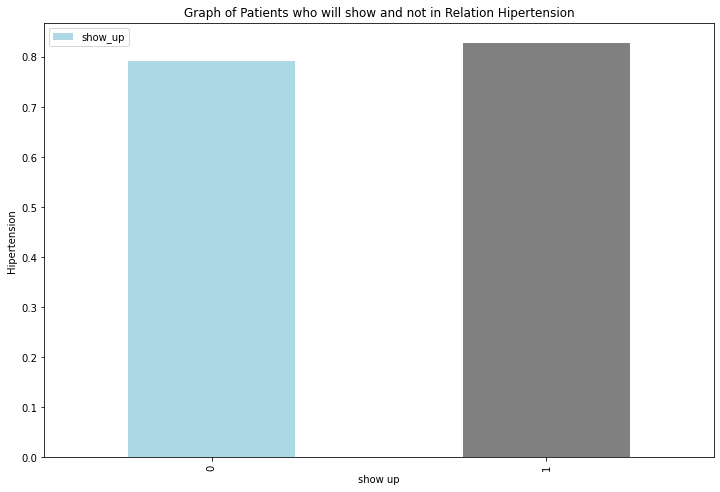

In [118]:
df.groupby('Hipertension')['show_up'].mean().plot(kind = 'bar', color =['lightblue','gray'], figsize=(12,8))
plt.xlabel("show up")
plt.ylabel("Hipertension")
plt.title("Graph of Patients who will show and not in Relation Hipertension")
plt.legend()
plt.show()

### Description
20% of those patients wo are Hipertensive are more likely to show up for their scheduled appointment compare to 16% of
those who are not likely to show.

### Is the Patient Diabetic?

In [119]:
df.Diabetes[show_up].mean()

0.0738368401959006

In [120]:
df.Diabetes[no_show].mean()

0.06407097092163627

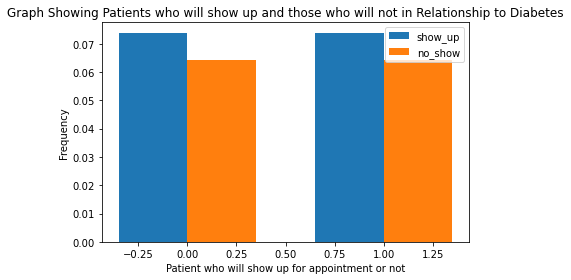

In [121]:
labels = ['Show Up', 'No Show']
show_up_mean = df.Diabetes[show_up].mean()
noShow_mean = df.Diabetes[no_show].mean()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, show_up_mean, width, label='show_up')
rects2 = ax.bar(x + width/2, noShow_mean, width, label='no_show')

plt.xlabel('Patient who will show up for appointment or not')
ax.set_ylabel('Frequency')
plt.title("Graph Showing Patients who will show up and those who will not in Relationship to Diabetes")
ax.legend(fontsize=10)
fig.tight_layout()
plt.show()

## Description
Our analysis above shows there is a significant difference in the mean of those patients who will show up and those who
will not in relation to having Dabetes. Basically, we can say that a patient diagnosed of Diabetes is more likely to shore up for their appointment than those without.

### Is the Patient suffering from Alcoholism?

In [122]:
#Again we look mean different between these group and draw a conclusion
df.Alcoholism[show_up].mean()

0.030416742245601307

In [123]:
df.Alcoholism[no_show].mean()

0.030332900219543886

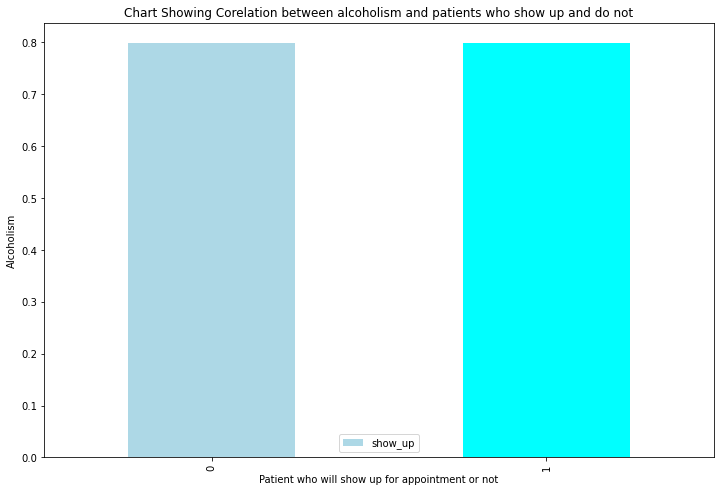

In [124]:
df.groupby('Alcoholism')['show_up'].mean().plot(kind='bar', color=['lightblue','cyan'], figsize=(12,8));
plt.xlabel("Patient who will show up for appointment or not")
plt.ylabel("Alcoholism")
plt.title("Chart Showing Corelation between alcoholism and patients who show up and do not")
plt.legend()
plt.show()

## Description
Looking analysis above it oberved that there is no much difference between patient who will show up or not. The
difference in mean is insignificant.

## Is the patient Handicap


In [125]:
#Let us comapare the means
df.Handcap[show_up].mean()

0.022741701432976602

In [126]:
df.Handcap[no_show].mean()

0.02029660827097988

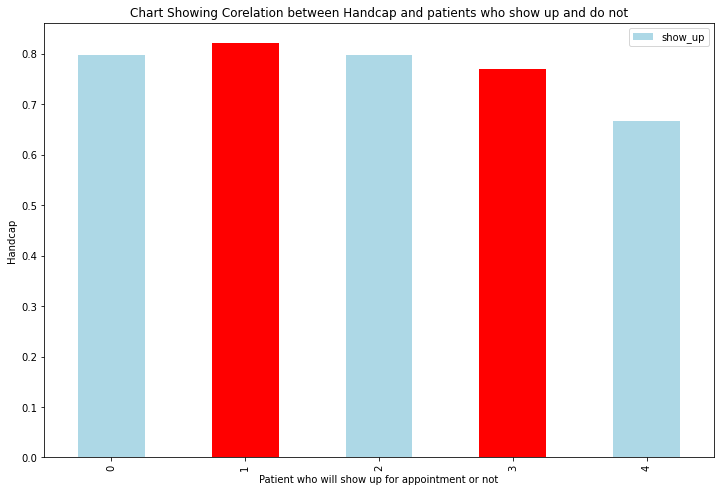

In [127]:
df.groupby('Handcap')['show_up'].mean().plot(kind='bar', color=['lightblue','red'], figsize=(12,8));
plt.xlabel("Patient who will show up for appointment or not")
plt.ylabel("Handcap")
plt.title("Chart Showing Corelation between Handcap and patients who show up and do not")
plt.legend()
plt.show()

## Description
Based on the analysis above we can see that there four categories of Handicap. However, there is no significant in their 
means. Therefore, it is difficult to say which patient in these category will show up for an appointment or not.

<a id='conclusions'></a>
## Conclusions

>  An analysis is performed on over 100k medical appointments data in Brazil to determined if patients will show up for their appointment. Factors such as Is the Patient enrolled in Brasilian welfare program Bolsa Família?. Did the Patient recieved a Short Message Service (SMS)?. Is the Patient diagnosed of any illness?. How old is a Patient? 

> After a carefull analysis, the following findings were made. Comparing the mean of the patients who will show up (0.11) for their schedule appointment with those who will not (0.09) in relation to if a patient is on the Brasilian welfare program Bolsa Família scholarship, we can see that the mean of those who will turn up is significantly higher than those who will not show up. This indicate that these patient are more likely to show up for their scheduled appointment.

>44% of the Patients who show up recieved Short Message Service (SMS) as against 29% of the rest. This is a good indication that there is a chance most patient will show when recieve as SMS.

>The average age of those patients who will show up for their slated appointment is 34, this is insignificant to 37 of those patients who will not show up. This implies that younger people are more likely to show up for their schedile appointment compare to older people.

>20% of those patients wo are Hipertensive are more likely to show up for their scheduled appointment compare to 16% of those who will not show up.

> The mean of those patient that will show up shows 0.07 sightly higher than that of the patients who will not show up (0.06). we can say that a patient diagnosed of Diabetes is more likely to shore up for their appointment than those without.

>However, there is no significant difference in the means of Alcoholic and Handicap patient.